In [1]:
import sys
!{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install requests
from bs4 import BeautifulSoup
import requests
from urllib import request
import os
import pandas as pd
from googletrans import Translator
from pathlib import Path

#Import NLTK and Texts
import nltk
nltk.download('gutenberg')
nltk.download('averaged_perceptron_tagger')
#Command All Matplotlib Graphs to Appear in Inline in Notebook
# %matplotlib inline

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/thagen/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/thagen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
# https://www.gutenberg.org/cache/epub/3600/pg3600-images.html
# https://gutendex.com/
# https://www.scrapingbee.com/blog/python-web-scraping-beautiful-soup/
# https://www.geeksforgeeks.org/find-the-text-of-the-given-tag-using-beautifulsoup/

In [3]:
response = requests.get("https://www.gutenberg.org/cache/epub/2229/pg2229-images.html")
if response.status_code != 200:
	print("Error fetching page")
	exit()
else:
	content = response.content
# print(content)

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')

# print(soup.title) # title w HTML
# print(soup.title.string) # title as string (no HTML)
# print(soup.get_text()) all text (no HTML)

In [5]:
data = [element.text for element in soup.find_all("p")]
bookstr = ' '.join(data)

In [7]:
# data cleaning - tokenize
from datacleaning import dataCleaning
dc=dataCleaning(bookstr)
clean_tokens = dc.textcleaner()

[nltk_data] Downloading package punkt to /Users/thagen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
df = pd.DataFrame({'de-word-list': clean_tokens})
df.head()

,de-word-list
0,title
1,faust
2,tragödie
3,erster
4,teil


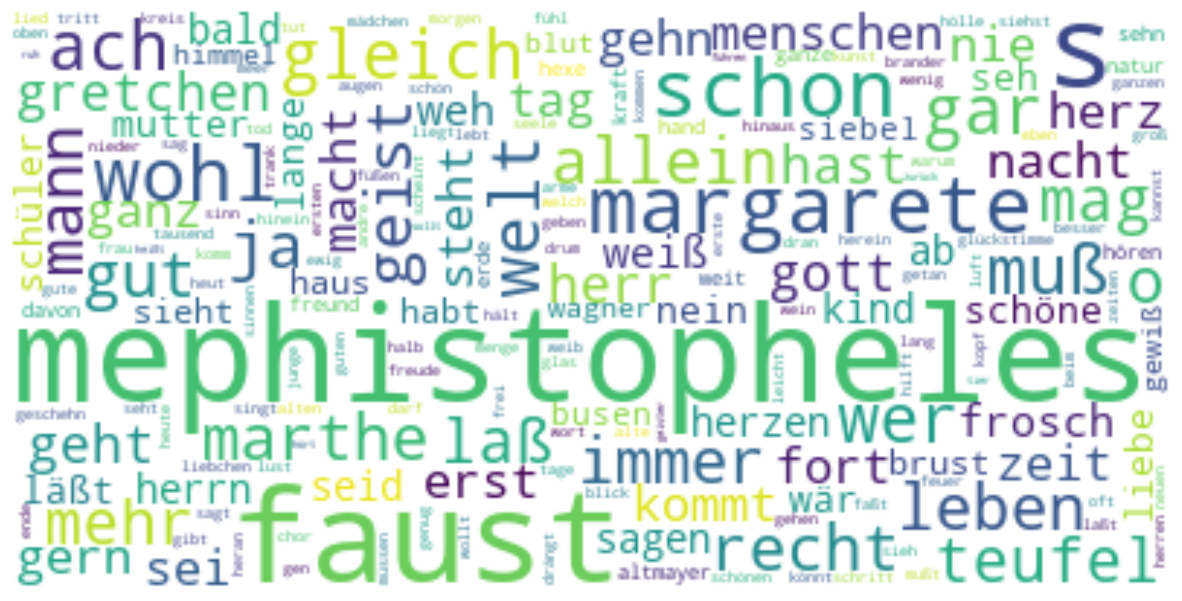

In [34]:
# generate word cloud
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
df_str = df.to_string()
wordcloud = WordCloud(background_color="white").generate(df_str)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
# generate word count frequency
from collections import Counter
def counterObject(words):
    def _counterObject():
        return collections.Counter(words)
    return _counterObject

df2 = pd.DataFrame.from_dict([Counter(clean_tokens)]).T
df2.rename(columns={0: 'word_count'}, inplace=True)
df2.sort_values(by=['word_count'], inplace=True, ascending=False)
df2.head(50)

,word_count
mephistopheles,283
faust,265
s,217
margarete,84
schon,84
wohl,75
geist,55
ach,55
muß,55
wer,54
